<a href="https://colab.research.google.com/github/KamilaAkhmetova/MPA-MLF/blob/main/Ex_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # MKA-MLF, Lab_07 Convolutional Neural Networks

## Exercise - XOR Gate

## Exercise - Hand-written digits recognition

Create CNN which will process and recognize handwritten digits. For this purposes please use the MNIST database (Modified National Institute of Standards and Technology database) which is a large database of handwritten digits that is commonly used for training various image processing systems.

The datasample of the MNIST datasets can be see in the following picture

![mnist_data_sample.png](attachment:eb3e0d6a-ccb0-499d-9847-ecbc554dbce0.png)

### Task description

In the terms of machine learning, the Hand-written digits recognition can be threated as a multi-class classification problem. This is very important knowledge to structure our model in the correct way (Especially the output-layer, including the number of neurons and activations function and the overall loss function and classification metrics)

### 0. Import libraries

Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task

In [22]:
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import matplotlib
import matplotlib.pyplot as plt
###################################
# Write your own code here #

from keras.utils import to_categorical
from keras.optimizers import SGD
import seaborn as sns
from sklearn.metrics import confusion_matrix
from keras.regularizers import l1_l2
from keras.optimizers import Adam

###################################
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

### 1. Dataset

#### 1.1 Load Dataset

You can load the dataset using the following code

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

#### 1.2 Dataset examination

Using the following code, display random images,

In [ ]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

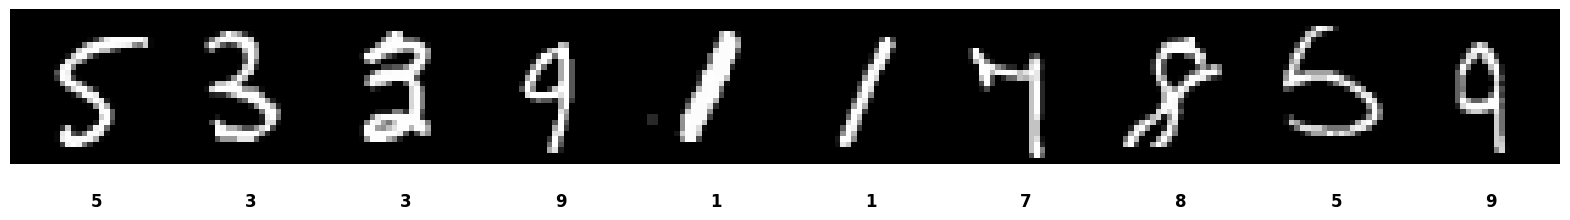

In [ ]:
display_random_images(X_train, y_train)

Examine the dataset. Answer for yourself the following questions:

- What kind of data occurs in our dataset?
- How many data samples do we have in train and test datasets?
- How many colour channels does the input variable have?
- What is the size of the input images?
- What is the necessary preprocessing of the input data X?
- How many classes do we have in target varoable?
- What is the necessary preprocessing of target variable y?

In [ ]:
# 1
#  images of digits (mnist)

In [ ]:
# 2
# 60000 in the train and 10000 in the test
X_train.shape[0]
X_test.shape[0]

10000

In [ ]:
# 3
# 1 channel



In [ ]:
#4
#  the size of the input images is 28, 28
X_train.shape[1:]
X_test.shape[1:]

(28, 28, 1)

In [ ]:
# 5
# normalization(next task) and reshaping

In [ ]:
# 6
# 10 different classes since we have digits from 0 to 9

In [ ]:
# 7
# one hot encodint(to_categorical)

#### 1.3 Dataset preprocessing

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

In [ ]:
# preprocessing
X_train= X_train.astype('float32') / 255.0
X_test= X_test.astype('float32') / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [8]:
# y_train_encoded = to_categorical(y_train, num_classes=10)

### 2. Build the model

In [ ]:
# model = Sequential()
# model.add(Conv2D(32,kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size = 2))

# model.add(Flatten(input_shape=(28, 28, 1)))
# model.add(Dense(128, activation='sigmoid'))
# model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### 2.1 Define the model structure

In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)
    
    


In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 2.2 Compile the model

Build the model, use the relevant metrics, optimizer and loss function. While choosing the metrics and loss function, consider fact that we are are trying to solve the multiclass classification problem

In [ ]:
loss = None
optimizer = None
metrics = None
learning_rate = 0.0

###################################
# Write your own code here #
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])


###################################
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

### 3. Training stage

#### 3.1 Model training

train your model, define the relevant hyperparameters (no. epochs, batch_size), use 20p of the training data for validation

In [ ]:
# history = model.fit(X_train, y_train_encoded, epochs=5, batch_size=128, validation_split = 0.2)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 24s 64ms/step - accuracy: 0.9962 - loss: 0.0184 - val_accuracy: 0.9859 - val_loss: 0.0503
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - accuracy: 0.9981 - loss: 0.0122 - val_accuracy: 0.9851 - val_loss: 0.0500
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 0.9985 - loss: 0.0101 - val_accuracy: 0.9872 - val_loss: 0.0485
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.9991 - loss: 0.0076 - val_accuracy: 0.9871 - val_loss: 0.0450
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 63ms/step - accuracy: 0.9992 - loss: 0.0060 - val_accuracy: 0.9863 - val_loss: 0.0498


In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data = (X_test, y_test), verbose = 2)

Epoch 1/20
469/469 - 29s - 62ms/step - accuracy: 0.9384 - loss: 0.2152 - val_accuracy: 0.9748 - val_loss: 0.0826
Epoch 2/20
469/469 - 39s - 84ms/step - accuracy: 0.9796 - loss: 0.0693 - val_accuracy: 0.9830 - val_loss: 0.0525
Epoch 3/20
469/469 - 41s - 87ms/step - accuracy: 0.9866 - loss: 0.0460 - val_accuracy: 0.9837 - val_loss: 0.0462
Epoch 4/20
469/469 - 41s - 87ms/step - accuracy: 0.9901 - loss: 0.0335 - val_accuracy: 0.9846 - val_loss: 0.0464
Epoch 5/20
469/469 - 26s - 55ms/step - accuracy: 0.9924 - loss: 0.0255 - val_accuracy: 0.9871 - val_loss: 0.0397
Epoch 6/20
469/469 - 27s - 58ms/step - accuracy: 0.9942 - loss: 0.0188 - val_accuracy: 0.9856 - val_loss: 0.0437
Epoch 7/20
469/469 - 26s - 56ms/step - accuracy: 0.9952 - loss: 0.0150 - val_accuracy: 0.9854 - val_loss: 0.0456
Epoch 8/20
469/469 - 41s - 87ms/step - accuracy: 0.9964 - loss: 0.0123 - val_accuracy: 0.9868 - val_loss: 0.0390
Epoch 9/20
469/469 - 41s - 87ms/step - accuracy: 0.9976 - loss: 0.0084 - val_accuracy: 0.9872 - 

#### 3.1 Model Evaluation on validation data

In [14]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 0.05224394425749779
Test accuracy: 98.69999885559082 %


Plot the development of the training and validation loss, and training and validation metrics.

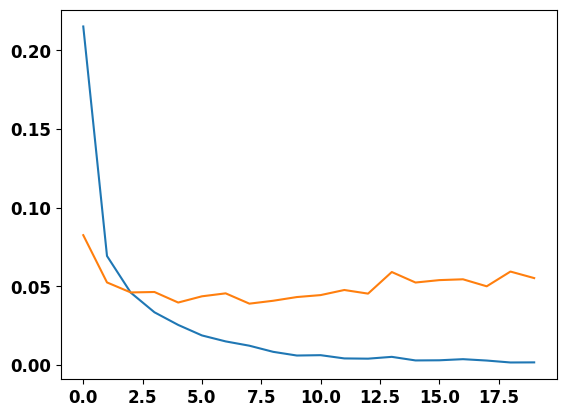

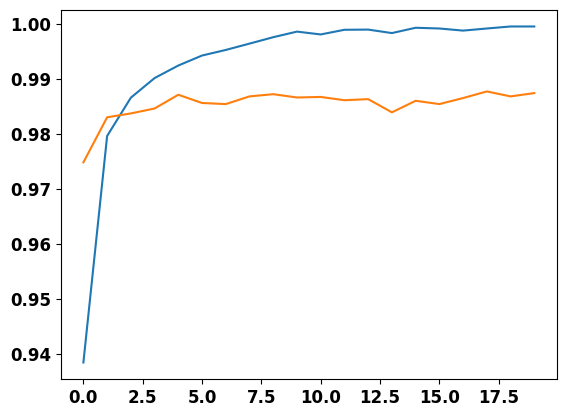

In [15]:
###################################
# Write your own code here #

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
###################################

### 4. Model evaluation

Evaluate the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


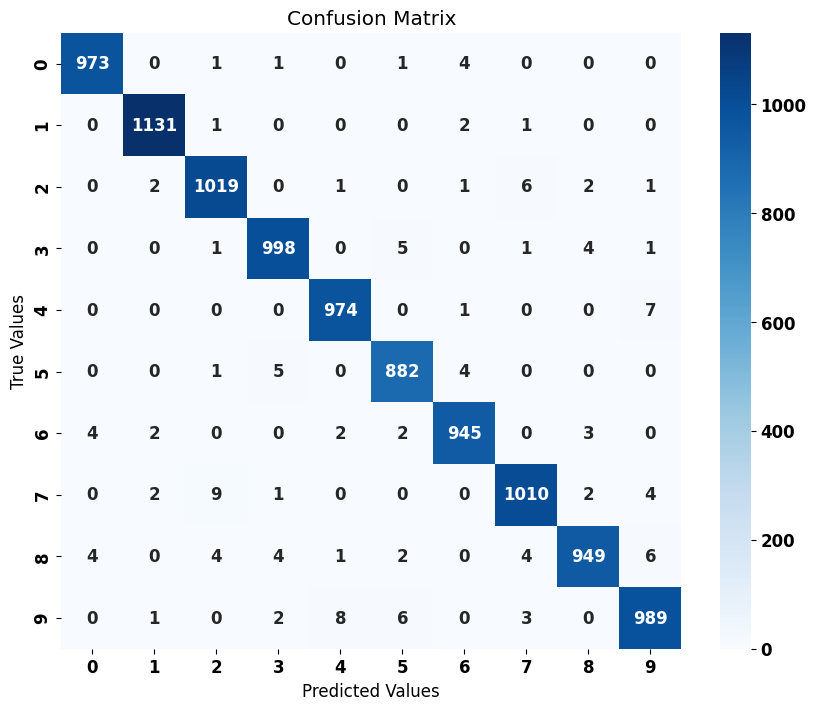

In [17]:
###################################
# Write your own code here #
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, 1)
y_true = np.argmax(y_test, 1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt = 'd', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

###################################

### 5. Hyperparameter tunning and regularization techniques

When your code is ready and fully functional, try several changes in the hyperparameters and see how they influence the testing metrics. Try changes in the network structure. You can also try adding regularization techniques such as L1, L2, and Dropout. Based on the development of training and validation loss, try to identify overfitting and avoid it

In [20]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)), Dropout(0.25))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data = (X_test, y_test), verbose = 2)

Epoch 1/20
469/469 - 27s - 58ms/step - accuracy: 0.9393 - loss: 0.2161 - val_accuracy: 0.9754 - val_loss: 0.0781
Epoch 2/20
469/469 - 42s - 89ms/step - accuracy: 0.9814 - loss: 0.0650 - val_accuracy: 0.9812 - val_loss: 0.0606
Epoch 3/20
469/469 - 40s - 85ms/step - accuracy: 0.9873 - loss: 0.0447 - val_accuracy: 0.9859 - val_loss: 0.0423
Epoch 4/20
469/469 - 41s - 87ms/step - accuracy: 0.9910 - loss: 0.0320 - val_accuracy: 0.9857 - val_loss: 0.0441
Epoch 5/20
469/469 - 26s - 55ms/step - accuracy: 0.9926 - loss: 0.0249 - val_accuracy: 0.9871 - val_loss: 0.0419
Epoch 6/20
469/469 - 26s - 55ms/step - accuracy: 0.9953 - loss: 0.0183 - val_accuracy: 0.9870 - val_loss: 0.0414
Epoch 7/20
469/469 - 41s - 87ms/step - accuracy: 0.9965 - loss: 0.0143 - val_accuracy: 0.9869 - val_loss: 0.0414
Epoch 8/20
469/469 - 41s - 87ms/step - accuracy: 0.9975 - loss: 0.0107 - val_accuracy: 0.9865 - val_loss: 0.0442
Epoch 9/20
469/469 - 41s - 88ms/step - accuracy: 0.9976 - loss: 0.0099 - val_accuracy: 0.9832 - 

In [25]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100:.2f}%')

Test loss: 0.05006955936551094
Test accuracy: 98.79%
